In [2]:
import requests
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib

In [3]:
url='https://www.dsgap.gov.mo/pdpi/api/company/'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
r=requests.get(url, headers=headers)
data=r.json()

In [157]:
import re

edges=[]
for company in data:
    company_name=company['name']
    try:
        for council in company['revision']['json']['architectureList']:
            for member in council['memberList']:
                member_name = re.sub(r'\(([^)]*)\)|\（([^）]*)\）', '', member.get('name').get('tc'))
                if (member_name is not None) or (member_name==''):
                    edges.append((company_name, member_name))
    except:
        pass

edges=set(edges)

In [158]:
member = {
    'name': {
        'tc': ' 1（John Doe）'
    }
}

# Extract the member name and remove the unwanted characters
member_name = re.sub(r'\(([^)]*)\)|\（([^）]*)\）', '', member.get('name').get('tc'))

# Print the result to check if it's correct
print(member_name)

 1


In [159]:

G=nx.Graph()
for node in edges:
    G.add_nodes_from([(node[0], {'type': 'company'})])
    G.add_nodes_from([(node[1], {'type': 'member'})])


for edge in edges:
    G.add_nodes_from(set([j for i in edges for j in i]), weight=1)
    G.add_edge(edge[0], edge[1])


In [160]:
weight={node[0]:1 if node[1]['type']=='member' else 5 for node in G.nodes(data=True)}
nx.set_node_attributes(G, weight ,'weight')


In [167]:
lst_member=[]
for node in G.nodes(data=True):
    if node[1]['type']=='member':
        lst_member.append(node[0])
G.degree(lst_member)

DegreeView({'黃中原': 2, '孔兆偉': 1, '吳松': 4, '戴建業': 3, '張海鴻': 3, '許彥彬': 2, '鮑文輝': 1, '馬曉東': 1, '鄭冠偉': 2, '孫洪濤': 14, '徐杰': 1, '黃浩彪': 2, '沙雁期': 1, '王丹': 13, '尚瑋': 13, '馬有恆': 2, '葉一新': 1, '徐建': 4, '賀力文': 1, '澳門大學': 2, '李志忠': 8, '楊道匡': 1, '蕭志偉': 2, '譚志煒': 2, '袁泳貴': 1, '江麗利': 2, '廖僖芸': 1, '包敬燾': 1, '梁漢新': 1, '梁以恆': 3, '張小兵': 1, '葛偉': 2, '戴建業 ': 1, '吳錦華': 1, '簡焯坤': 6, '劉佳華': 1, '梁竟成': 2, '陳俊翔': 1, '吳建峰': 4, '鍾聖心': 2, '容光亮': 2, '王志剛': 1, '許健華': 1, '李時泰': 6, '澳門旅遊娛樂股份有限公司': 1, '鄭杰釗': 1, '大西洋銀行股份有限公司': 1, '張樂田': 2, '譚百業': 1, '張展翔': 1, '劉丁己': 3, '陳穎雄': 2, '胡嘉 ': 1, '張清': 1, '阮家榮': 1, '馬健華': 2, '林金城': 4, '羅銳榮': 2, '吳建峰 ': 1, '黃嘉祺': 1, '稅兵': 4, '劉永誠': 2, '黃文傑 ': 1, '朱丹寧': 5, '何燕梅': 1, '邱庭彪': 2, '馮嘉林': 2, '徐文玲': 1, '黃顯輝': 1, '何子浩': 1, '陳漢生': 1, '謝思訓': 2, '盛力': 2, '': 4, '黃文傑': 1, '教育基金': 2, '蘇樹輝': 4, '何美華': 2, '澳門商業銀行股份有限公司': 1, '鄧君明': 2, '黃逸恆': 1, '李詠瑜': 1, '胡達忠': 1, '董濤': 2, '莫志偉': 1, '廖澤雲': 2, '黃嘉豪': 1, '何超瓊': 4, '韋海揚': 2, '梁麗嫻': 1, '鄭光普': 1, '王菲': 1, '吳秀虹': 1, '蔡炳祥': 1, '梁惠敏': 1, '葉煒': 1, '黃偉鴻': 1,

305.0


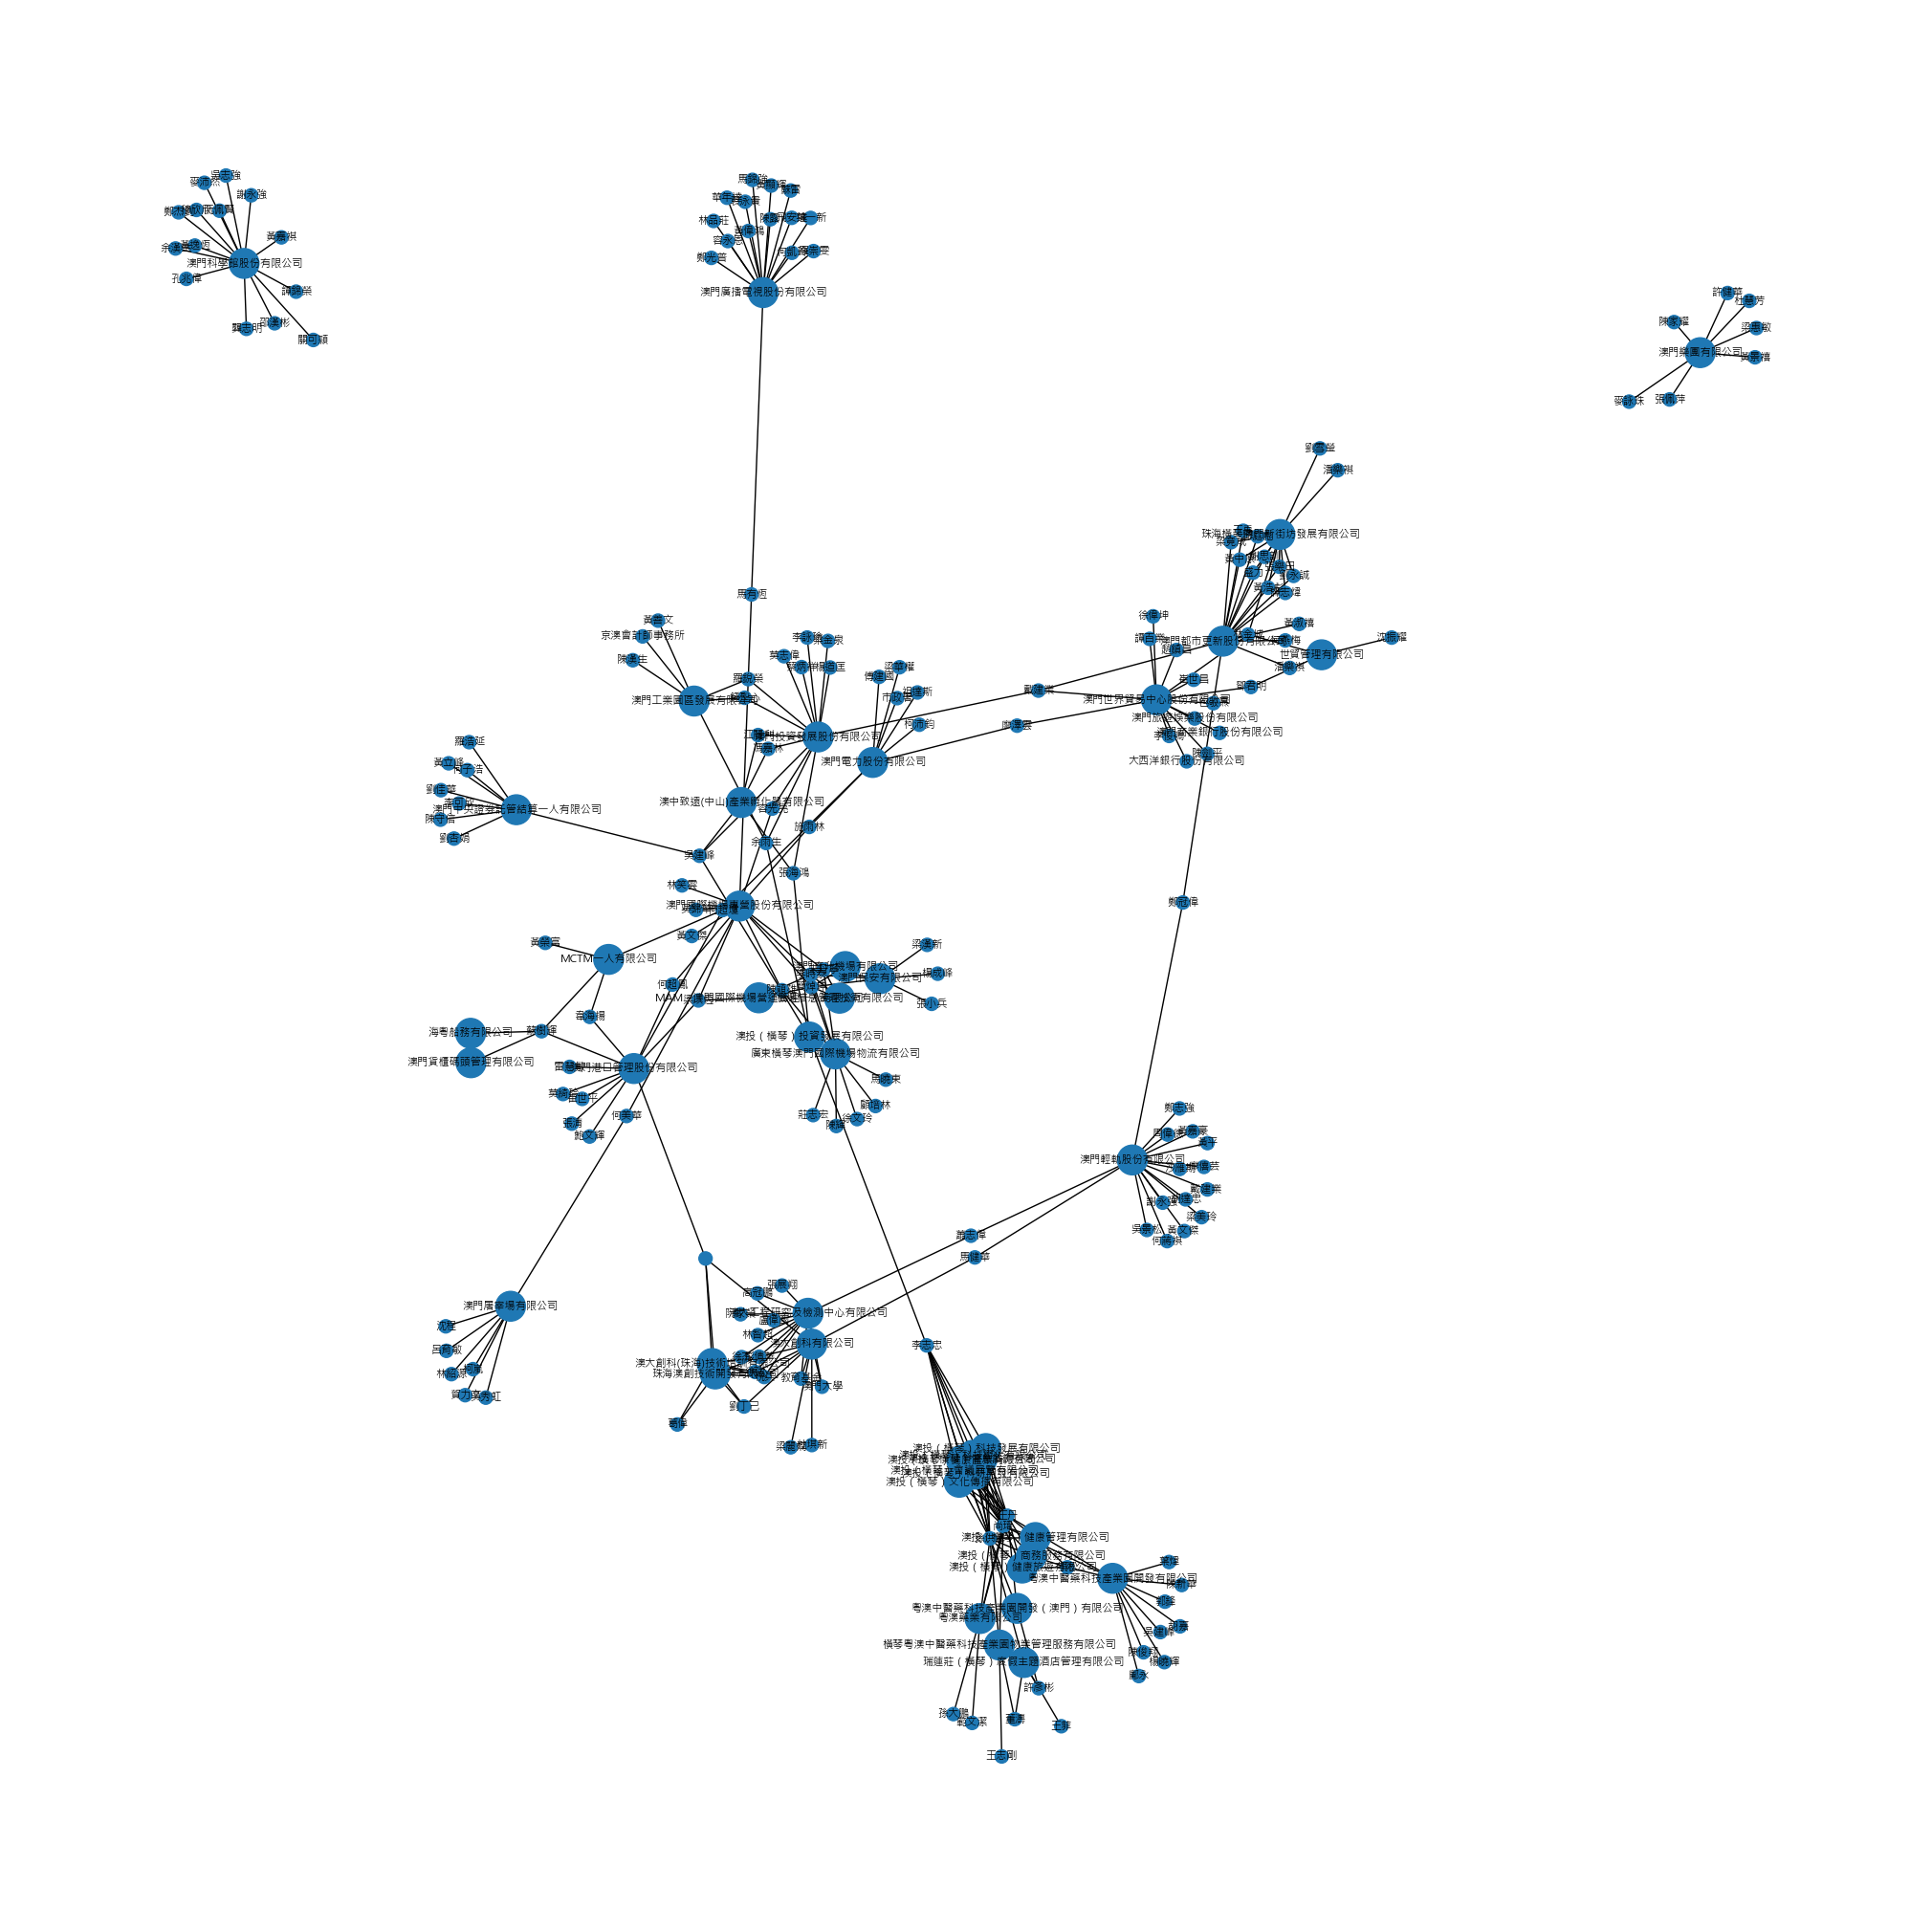

In [162]:
plt.rcParams['font.sans-serif']='Microsoft JhengHei'
print(G.size(weight="weight"))
plt.figure(3,figsize=(20,20)) 
nx.draw_spring(G, with_labels=True, node_size=[i*100 for i in nx.get_node_attributes(G,'weight').values()] ,font_size=8)